<a href="https://colab.research.google.com/github/veljkoselakovic/Python-Machine-Learning-Raschka/blob/main/Logistic%20Regression/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split


**Getting the dataset from** `sklearn`

In [13]:

iris = datasets.load_iris()

x=iris.data[:, [2,3]]
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, stratify=y)


**Plotting function**

In [ ]:
def plot_decision_regions(x,y, classifier,  test_idx = None, resolution = 0.02):
  from matplotlib.colors import ListedColormap

  # Marker generator + color map
  markers = ('s', 'x', 'o', '^', 'y')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  
  # Plot decision surfaces
  x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  z = z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # Plot examples
  for idx, cl in enumerate(np.unique(y)):
    c = "Iris Versicolor" if cl == 1 else "Iris Setosa"
    plt.scatter(x = x[y==cl, 0], y = x[y == cl, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = markers[idx],
                label = c,
                edgecolor='black')
    if test_idx:
      x_test, y_test = x[test_idx, :], y[test_idx]
      plt.scatter(x_test[:, 0], x_test[:, 1], c ='', edgecolor='black', alpha = 1.0, linewidth=1, marker='o', s =100, label='test set')
  #plt.show()


**Sigmoid function**

In [ ]:
def sigmoid(z):
  import numpy
  return 1.0 / (1.0 + np.exp(-z))
  

<center><b>error cost function</b></center>
---

$$J(\omega) = \sum_{i} \frac{1}{2} (\phi(z^{(i)}) - y^{(i)})^2 $$ 


<center><b>confidence</b></center>

---
$$L(\omega) = P (y | x; \omega) = \prod_{i=1}^{n} P(y^{(i)}|x^{(i)}; \omega) = \prod_{i=1}^{n} (\phi(z^{(i)}))^{y^{(i)}} (1 - \phi(z^{(i)}))^{1-y^{(i)}}$$

log $L(\omega)$ ...

**LogisticRegression Model**

In [ ]:
class LogisticRegressionGD(object):
  def __init__(self, eta = 0.05, n_iter = 100, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, x, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1 + x.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(x)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * x.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1-output))))
      self.cost_.append(cost)
    return self


  def net_input(self, x):
    return np.dot(x, self.w_[1:]) + self.w_[0]
  def activation(self, x):
    return 1. / (1. + np.exp(-np.clip(x, -250, 250)))
  def predict(self, x):
    return np.where(self.net_input(x)>= 0.0, 1, 0)

**Testing the Linear Regression**

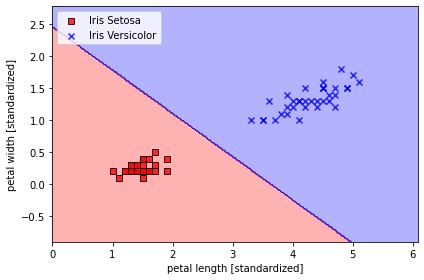

In [14]:
x_train_01_subset = x_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lgrd = LogisticRegressionGD(eta = 0.05, n_iter = 1000, random_state = 1)
lgrd.fit(x_train_01_subset, y_train_01_subset)
plot_decision_regions(x_train_01_subset, y_train_01_subset, classifier=lgrd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

**Using** `scikit-learn` **Linear regression model**


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


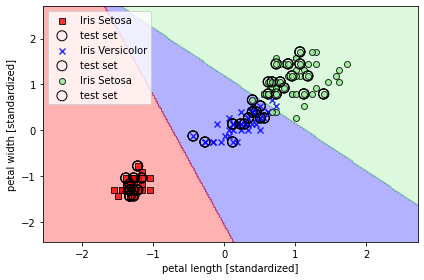

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100.0, random_state = 1, solver = 'lbfgs', multi_class = 'ovr')
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))
lr.fit(x_train_std, y_train)
plot_decision_regions(x_combined_std, y_combined, classifier = lr, test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()